In [122]:
import pandas as pd
import numpy as np

df = pd.read_csv("C:\\Users\\pambalgx\\Downloads\\DS\\datasets\\telecom_churn.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [124]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [125]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [126]:
df.describe(include = ['object', 'bool'])

,state,phone number,international plan,voice mail plan,churn
count,3333,3333,3333,3333,3333
unique,51,3333,2,2,2
top,WV,382-4657,no,no,False
freq,106,1,3010,2411,2850


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [128]:
df.shape

(3333, 21)

In [129]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [130]:
df['churn'] = df['churn'].astype('int64')

In [131]:
df['churn'].value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

In [132]:
df['churn'].value_counts(normalize=True)

churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64

In [133]:
df.sort_values(by=['churn', 'total day charge'], ascending=[True, False]).head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
688,MN,13,510,338-7120,no,yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,363-7802,no,yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,373-6784,no,no,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,351-7369,no,yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,388-8583,no,yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


In [134]:
# what is the proportion of churned users in our dataframe?
df['churn'].mean()

0.14491449144914492

In [135]:
# What are average values of numerical features for churned users?
df_numeric = df[['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn']]
df_numeric.head()

df_numeric[df_numeric['churn'] == 1].mean()

account length            102.664596
area code                 437.817805
number vmail messages       5.115942
total day minutes         206.914079
total day calls           101.335404
total day charge           35.175921
total eve minutes         212.410145
total eve calls           100.561077
total eve charge           18.054969
total night minutes       205.231677
total night calls         100.399586
total night charge          9.235528
total intl minutes         10.700000
total intl calls            4.163561
total intl charge           2.889545
customer service calls      2.229814
churn                       1.000000
dtype: float64

In [136]:
# How much time (on average) do churned users spend on the phone during daytime?
df_numeric[df_numeric['churn'] == 1]['total day minutes'].mean()

206.91407867494823

In [137]:
# What is the maximum length of international calls among loyal users (Churn == 0) who do not have an international plan?
df_numeric[(df_numeric['churn'] == 0) & (df['international plan'] == 'no')]['total intl minutes'].max()

18.9

In [138]:
# give us the values of the rows with index from 0 to 5 (inclusive) and columns labeled from State to Area code (inclusive)
df.loc[0:5, "state":"area code"]

,state,account length,area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [139]:
df.iloc[0:5, 0:3]

,state,account length,area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


In [140]:
# first or the last line of the data frame
df[-1:] #last
df[:1] #first

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0


In [141]:
# apply to each column
df.apply(np.max)

state                           WY
account length                 243
area code                      510
phone number              422-9964
international plan             yes
voice mail plan                yes
number vmail messages           51
total day minutes            350.8
total day calls                165
total day charge             59.64
total eve minutes            363.7
total eve calls                170
total eve charge             30.91
total night minutes          395.0
total night calls              175
total night charge           17.77
total intl minutes            20.0
total intl calls                20
total intl charge              5.4
customer service calls           9
churn                            1
dtype: object

In [142]:
# need to select all states starting with W
df[df['state'].apply(lambda x: x[0] == 'W')].head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,357-3817,no,yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,352-1237,no,no,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,405-7146,no,yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,353-3759,no,no,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


In [143]:
#  replace values in a column
d = {
    'yes': True,
    'no': False
}
#df['international plan'] = df['international plan'].map(d)
df = df.replace({'international plan': d})
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,False,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,False,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,False,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,True,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,True,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [144]:
# groupby what column, then required columns then agg function
columns_to_show = ["total day minutes", "total eve minutes", "total night minutes"]
df.groupby(by='churn')[columns_to_show].describe()
df.groupby(by='churn')[columns_to_show].agg([np.mean, np.std, np.min, np.max])

total day minutes                  ... total night minutes             
                   mean        std amin  ...                 std  amin   amax
churn                                    ...                                 
0            175.175754  50.181655  0.0  ...           51.105032  23.2  395.0
1            206.914079  68.997792  0.0  ...           47.132825  47.4  354.9

[2 rows x 12 columns]

In [145]:
pd.crosstab(df_numeric['churn'], df['international plan'])

international plan,False,True
churn,,
0,2664,186
1,346,137


In [146]:
pd.crosstab(df_numeric['churn'], df['voice mail plan'])

voice mail plan,no,yes
churn,,
0,2008,842
1,403,80


In [147]:
# required columns, group by, statistic function
df.pivot_table(
["total day minutes", "total eve minutes", "total night minutes"],
['area code'],
aggfunc="mean"
)

,total day minutes,total eve minutes,total night minutes
area code,,,
408,177.175418,201.284248,199.214678
415,181.592628,200.652085,202.037583
510,178.787619,201.323929,200.229048


In [148]:
df['total charge'] = df['total day charge'] + df ['total night charge'] + df['total intl charge']
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total charge
0,KS,128,415,382-4657,False,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,58.78
1,OH,107,415,371-7191,False,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,42.62
2,NJ,137,415,358-1921,False,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,51.99
3,OH,84,408,375-9999,True,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,61.54
4,OK,75,415,330-6626,True,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,39.48


In [149]:
df.drop(['total charge'], axis=1, inplace=True)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,False,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,False,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,False,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,True,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,True,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [152]:
pd.crosstab(df_numeric['churn'], df['international plan'], margins=True)

international plan,False,True,All
churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


In [153]:
pd.crosstab(df_numeric['churn'], df['international plan'], normalize=True,margins=True)

international plan,False,True,All
churn,,,
0,0.79928,0.055806,0.855086
1,0.10381,0.041104,0.144914
All,0.90309,0.096910,1.000000


In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='international plan', ylabel='count'>

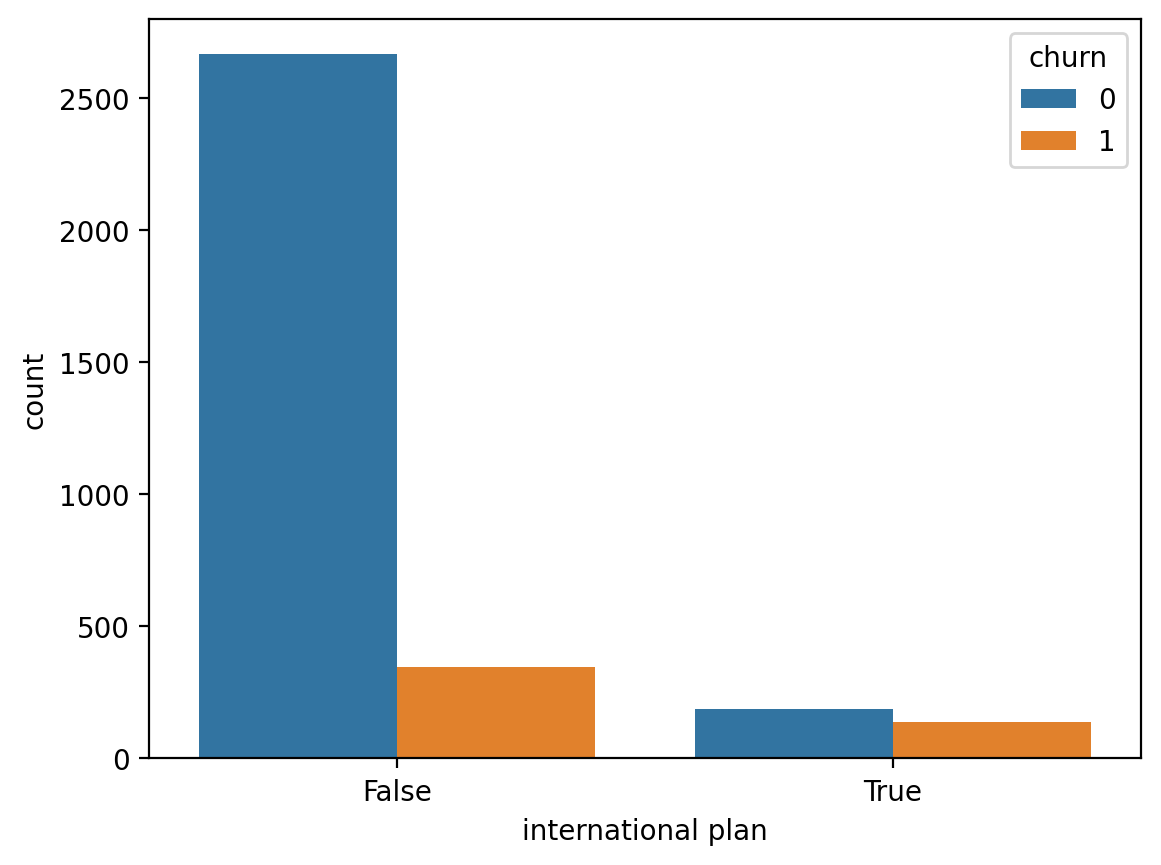

In [158]:
sns.countplot(x='international plan', hue='churn', data=df)

In [159]:
pd.crosstab(df_numeric['churn'], df['customer service calls'], margins=True)

customer service calls,0,1,2,3,4,5,6,7,8,9,All
churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


<Axes: xlabel='customer service calls', ylabel='count'>

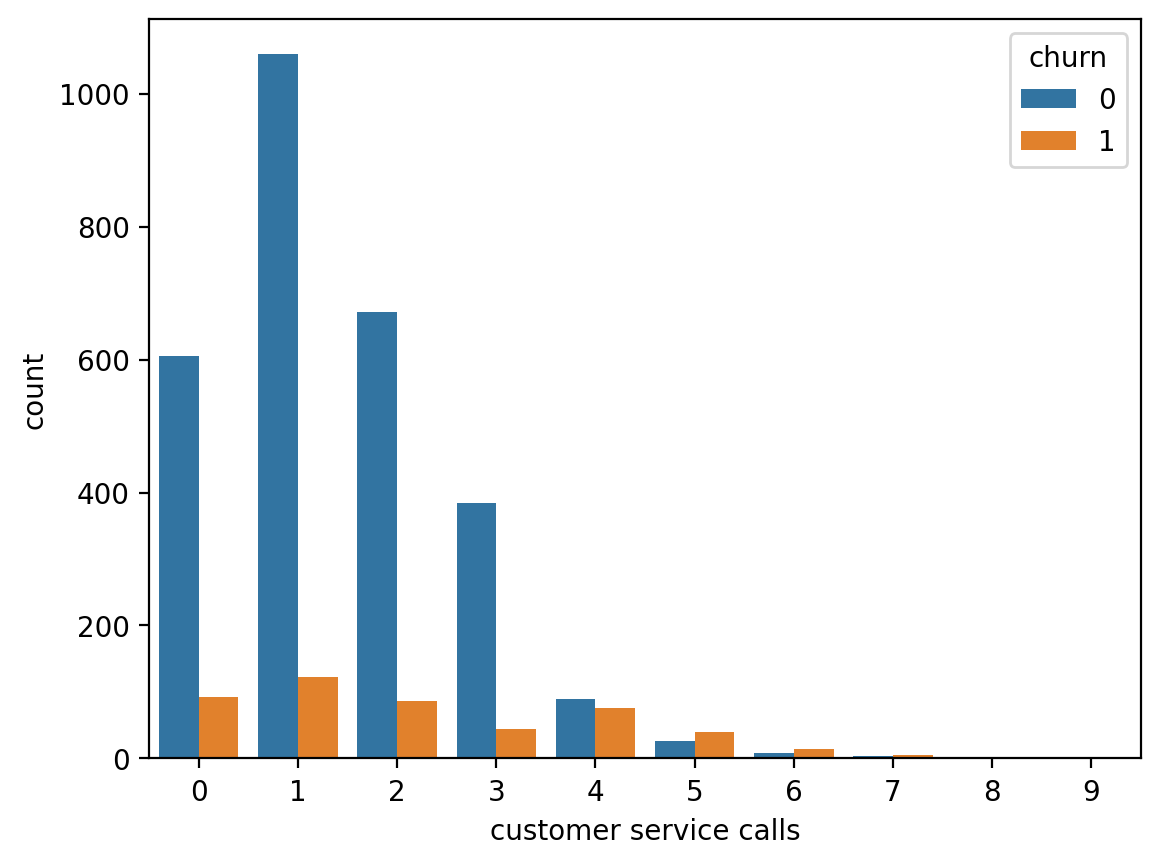

In [160]:
sns.countplot(x='customer service calls', hue='churn', data=df)

In [162]:
df['many service calls'] = (df['customer service calls'] > 3).astype("int")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,many service calls
0,KS,128,415,382-4657,False,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0
1,OH,107,415,371-7191,False,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0
2,NJ,137,415,358-1921,False,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,OH,84,408,375-9999,True,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0
4,OK,75,415,330-6626,True,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0


In [163]:
pd.crosstab(df_numeric['churn'], df['many service calls'], margins=True)

many service calls,0,1,All
churn,,,
0,2721,129,2850
1,345,138,483
All,3066,267,3333


<Axes: xlabel='many service calls', ylabel='count'>

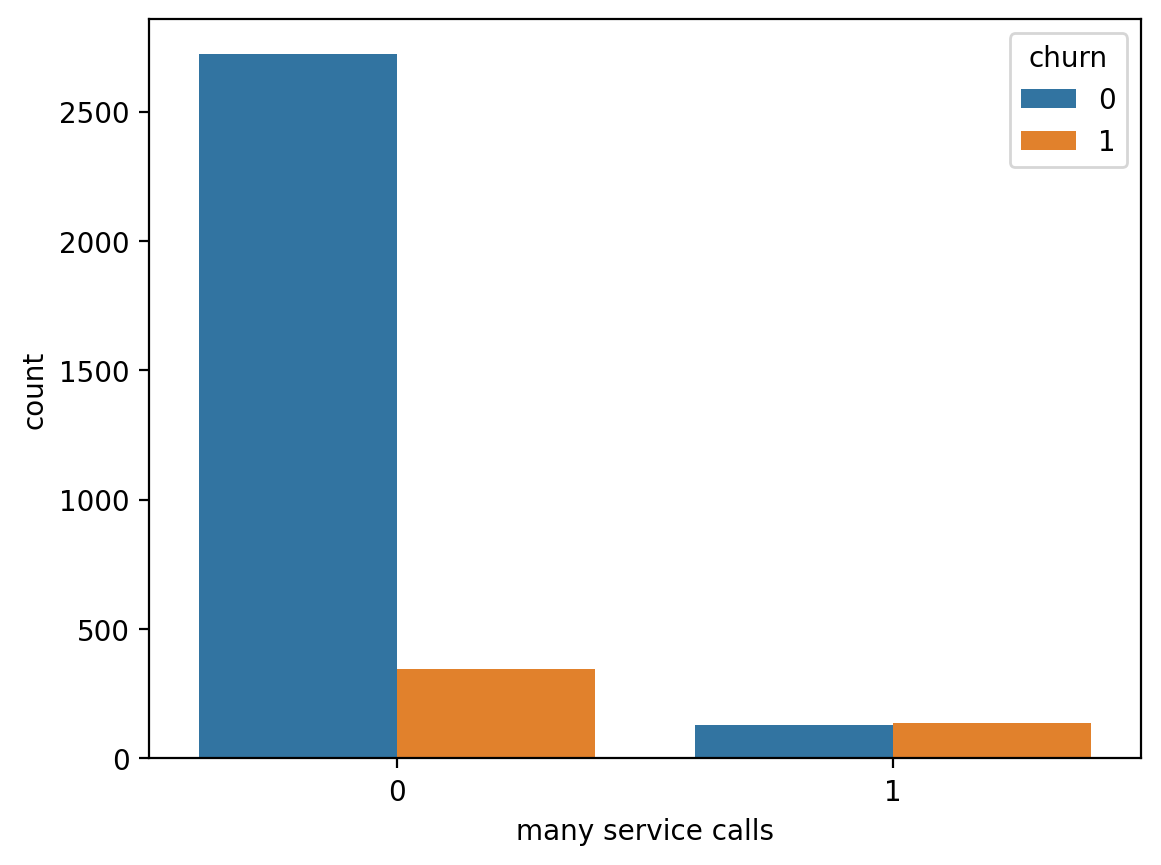

In [164]:
sns.countplot(x='many service calls', hue='churn', data=df)